In [4]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [5]:
# install dependencies: (use cu111 because colab has CUDA 11.1)
%pip install -U openmim
!mim install "mmengine>=0.7.0"
!mim install "mmcv>=2.0.0rc4"

# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

%pip install -e .

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 957.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 27.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.1/953.1 kB 61.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.1.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.3/450.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 19.1 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.1.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.3/99.3 MB 4.3 MB/s eta 0:00:00
Cloning into 'mmdetection'...
remote: Enumerating objects: 37679, done.
remote: Counting objects: 100% (280/280), done.
remote: Compressing objects: 100% (204/204), done.
remote: Total 37679 (delta 114), reused 157 (delta 72), pack-reused 37399
Receiving objects: 100% (37679/37679), 63.12 MiB | 25.13 MiB/s, done.
Resolving deltas: 100% (25937/25937), done.
/content/mmdetection
Obtaining file:///content/mmdetection
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mmdet


In [ ]:
from mmengine.utils import get_git_hash
from mmengine.utils.dl_utils import collect_env as collect_base_env

import mmdet


def collect_env():
    """Collect the information of the running environments."""
    env_info = collect_base_env()
    env_info['MMDetection'] = f'{mmdet.__version__}+{get_git_hash()[:7]}'
    return env_info


if __name__ == '__main__':
    for name, val in collect_env().items():
        print(f'{name}: {val}')

sys.platform: linux
Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
CUDA available: False
numpy_random_seed: 2147483648
GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
PyTorch: 2.1.0+cu118
PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.1.1 (Git Hash 64f6bcbcbab628e96f33a62c3e975f8535a7bde4)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - Build settings: BLAS_INFO=mkl, BUILD_TYPE=Release, CUDA_VERSION=11.8, CUDNN_VERSION=8.7.0, CXX_COMPILER=/opt/rh/devtoolset-9/root/usr/bin/c++, CXX_FLAGS= -D_GLIBCXX_USE_CXX11_ABI=0 -fabi-version=11 -fvisibility-inlines-hidden -DUSE_PTHREADPOOL -DNDEBUG -DUSE_KINETO -DLIBKINETO_NOROCTRACER -DUSE_FBGEMM -DUSE_QNNPACK -DUSE_PYTORCH_QNNPACK -DUSE_XNNPACK -DSYM

In [ ]:
!ls

CITATION.cff	   docker	mmdet		 pytest.ini	  requirements.txt  tests
configs		   docs		mmdet.egg-info	 README.md	  resources	    tools
dataset-index.yml  LICENSE	model-index.yml  README_zh-CN.md  setup.cfg
demo		   MANIFEST.in	projects	 requirements	  setup.py


In [3]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.1
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.13.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

In [ ]:
# We download the pre-trained checkpoints for inference and finetuning.
!mkdir ./checkpoints
!mim download mmdet --config rtmdet_tiny_8xb32-300e_coco --dest ./checkpoints

mkdir: cannot create directory ‘./checkpoints’: File exists
processing rtmdet_tiny_8xb32-300e_coco...
rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth exists in /content/mmdetection/checkpoints
Successfully dumped rtmdet_tiny_8xb32-300e_coco.py to /content/mmdetection/checkpoints


In [1]:
!pwd

/content


In [2]:
!ls

sample_data


In [ ]:
from mmdet.apis import DetInferencer
import numpy as np

# Choose to use a config
model_name = 'rtmdet_tiny_8xb32-300e_coco'
# Setup a checkpoint file to load
checkpoint = './checkpoints/rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth'

# Set the device to be used for evaluation
device = 'cpu'

# Initialize the DetInferencer
inferencer = DetInferencer(model_name, checkpoint, device)


for i in range(1):
    i = 3220
    print(i)
    # Use the detector to do inference
    img = './car_front/'+f'{i:06}'+'_img.jpg'
    print(img)
    result = inferencer(img, out_dir='./output_car_front')
    #print(result)
    #print(result['predictions'][0]['labels'])
    label_person = np.where(np.array(result['predictions'][0]['labels']) == 0)[0]
    score_person = np.where(np.array(result['predictions'][0]['scores']) >= 0.30)[0]
    #print(label_person)
    #print(score_person)

    person_score = list(set(label_person) & set(score_person))

print(person_score)
#print(result)


Loads checkpoint by local backend from path: ./checkpoints/rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std

12/05 04:58:52 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.


Output()

3220
./car_front/003220_img.jpg


/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


FileNotFoundError: ignored

In [ ]:
import pickle

path = "./output_car_bbox/bboxes_tlight.txt"

f = open(path,"rb")
list_row = pickle.load(f)



print(list_row)

print(len(list_row))


FileNotFoundError: ignored

In [ ]:
from IPython.display import Image
import matplotlib.pyplot as plt
import pickle

path = "./output_car_bbox/bboxes_tlight.txt"

f = open(path,"rb")
bbox = pickle.load(f)


print(bbox)
print(bbox[0])
print(len(bbox[0]))



for i in range(500):
    if len(bbox[i]) > 0:
        print(bbox[i][0])
    else:
        print(bbox[i])





FileNotFoundError: ignored

In [ ]:
brake = [0] * 10
print(brake)


print(list(np.array([1,2,3])*np.array([4,5,6])))


brake = [0]*20

print(brake)
brake[10:] = [1]*10

print(brake)



[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 10, 18]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:


#ブレーキを踏んでいないダミーデータ
brake = [0]*30

print(brake)

#ブレーキを踏んでいるダミーデータ
brake[25:] = [1]*(len(brake)-25)

print(brake)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


In [ ]:
from IPython.display import Image
import matplotlib.pyplot as plt
import pickle
import cv2
import numpy as np

#動画を分割した画像からheight,wigthを算出する
width = 1920
height = 1080

def red_mask(img):
    # 赤色は２つの領域にまたがります！！
    # np.array([色彩, 彩度, 明度])
    # 各値は適宜設定する！！
    LOW_COLOR1 = np.array([0, 64, 150]) # 各最小値を指定
    HIGH_COLOR1 = np.array([30, 255, 255]) # 各最大値を指定
    LOW_COLOR2 = np.array([150, 64, 150])
    HIGH_COLOR2 = np.array([179, 255, 255])

    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV) # RGB => YUV(YCbCr)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)) # claheオブジェクトを生成
    img_yuv[:,:,0] = clahe.apply(img_yuv[:,:,0]) # 輝度にのみヒストグラム平坦化
    img = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR) # YUV => RGB

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # BGRからHSVに変換

    bin_img1 = cv2.inRange(hsv, LOW_COLOR1, HIGH_COLOR1) # マスクを作成
    bin_img2 = cv2.inRange(hsv, LOW_COLOR2, HIGH_COLOR2)
    mask = bin_img1 + bin_img2 # 必要ならマスクを足し合わせる
    masked_img = cv2.bitwise_and(img, img, mask= mask) # 元画像から特定の色を抽出
    #cv2.imwrite("./out_img.jpg", masked_img) # 書き出す


    masked_img = cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB)

    """
    fig_mask = plt.figure()
    ax_mask = fig_mask.add_subplot(1,1,1)
    ax_mask.imshow(mask)

    fig_crop = plt.figure()
    ax_crop = fig_crop.add_subplot(1,1,1)
    ax_crop.imshow(masked_img)
    """

    return mask,masked_img



def green_mask(img):
    # 緑色は1つの領域にまたがります！！
    # np.array([色彩, 彩度, 明度])
    # 各値は適宜設定する！！
    LOW_COLOR1 = np.array([30, 64, 150]) # 各最小値を指定
    HIGH_COLOR1 = np.array([90, 255, 255]) # 各最大値を指定


    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV) # RGB => YUV(YCbCr)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)) # claheオブジェクトを生成
    img_yuv[:,:,0] = clahe.apply(img_yuv[:,:,0]) # 輝度にのみヒストグラム平坦化
    img = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR) # YUV => RGB

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # BGRからHSVに変換

    bin_img1 = cv2.inRange(hsv, LOW_COLOR1, HIGH_COLOR1) # マスクを作成
    mask = bin_img1
    masked_img = cv2.bitwise_and(img, img, mask= mask) # 元画像から特定の色を抽出
    #cv2.imwrite("./out_img.jpg", masked_img) # 書き出す


    masked_img = cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB)

    """
    fig_mask = plt.figure()
    ax_mask = fig_mask.add_subplot(1,1,1)
    ax_mask.imshow(mask)

    fig_crop = plt.figure()
    ax_crop = fig_crop.add_subplot(1,1,1)
    ax_crop.imshow(masked_img)
    """

    return mask,masked_img






path = "./output_car_bbox/bboxes_tlight.txt"

f = open(path,"rb")
bbox = pickle.load(f)

!pwd
#Image(filename='./car_front/003220_img.jpg')



for i in range(5000):

    print(i)

    # 画像読み込み
    img = cv2.imread("./car_front/"+f'{i:06}'+"_img.jpg")
    #print("./car_front/000"+str(i)+"_img.jpg")
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    temp_bbox = bbox[i]

    fig1 = plt.figure()
    ax1 = fig1.add_subplot(131)
    ax2 = fig1.add_subplot(132)
    ax3 = fig1.add_subplot(133)

    if len(temp_bbox) > 0:
        #指定範囲内で検出された中で最もスコアの高い信号機を検出
        temp = []
        for _,ele in enumerate(temp_bbox):
            if ele[0] >= 500 and ele[2] <= width-500:
                temp.append(ele)


        if len(temp) > 0:
            temp_bbox = temp[0]

            crop_img = img[int(temp_bbox[1]):int(temp_bbox[3]),int(temp_bbox[0]):int(temp_bbox[2])]
            #mask,masked_img = red_mask(crop_img)
            mask,masked_img = green_mask(crop_img)
            crop_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)

            ax1.imshow(crop_img)
            ax2.imshow(mask)
            ax3.imshow(masked_img)
            ax1.axis("off")
            ax2.axis("off")
            ax3.axis("off")
        else:
            ax1.imshow(np.zeros([128,128]))
            ax2.imshow(np.zeros([128,128]))
            ax3.imshow(np.zeros([128,128]))
            ax1.axis("off")
            ax2.axis("off")
            ax3.axis("off")

        plt.savefig("./crop_tlight_green/"+f'{i:06}'+".png")
        plt.close()

        """
        plt.imshow(crop_img)
        plt.axis("off")

        cv2.imwrite("./crop_img.jpg", crop_img)
        """



        pass
    else:

        ax1.imshow(np.zeros([128,128]))
        ax2.imshow(np.zeros([128,128]))
        ax3.imshow(np.zeros([128,128]))
        ax1.axis("off")
        ax2.axis("off")
        ax3.axis("off")

        plt.savefig("./crop_tlight_green/"+f'{i:06}'+".png")
        plt.close()







FileNotFoundError: ignored

In [ ]:
a = []
b = []
c = []


a.append([1,2,3,4])
a.append([5,6,7,8])


b.append([1,2,3,4])



print(len(a[0]))
print(len(b[0]))
print(c[0])


4
4


IndexError: ignored

動画を画像へ変換

In [ ]:
import cv2
import os

def save_all_frames(video_path, dir_path, basename, ext='jpg'):
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        return

    os.makedirs(dir_path, exist_ok=True)
    base_path = os.path.join(dir_path, basename)

    digit = len(str(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))))

    n = 0

    while True:
        ret, frame = cap.read()
        if ret:
            cv2.imwrite('{}_{}.{}'.format(base_path, str(n).zfill(digit), ext), frame)
            n += 1
        else:

            return

save_all_frames('./video_tlight.mp4', './temp/video/result', 'img')

In [ ]:
import glob





files = sorted(glob.glob("./temp/video/result/*"))

print(files)
print(len(files))





['./temp/video/result/img_000.jpg', './temp/video/result/img_001.jpg', './temp/video/result/img_002.jpg', './temp/video/result/img_003.jpg', './temp/video/result/img_004.jpg', './temp/video/result/img_005.jpg', './temp/video/result/img_006.jpg', './temp/video/result/img_007.jpg', './temp/video/result/img_008.jpg', './temp/video/result/img_009.jpg', './temp/video/result/img_010.jpg', './temp/video/result/img_011.jpg', './temp/video/result/img_012.jpg', './temp/video/result/img_013.jpg', './temp/video/result/img_014.jpg', './temp/video/result/img_015.jpg', './temp/video/result/img_016.jpg', './temp/video/result/img_017.jpg', './temp/video/result/img_018.jpg', './temp/video/result/img_019.jpg', './temp/video/result/img_020.jpg', './temp/video/result/img_021.jpg', './temp/video/result/img_022.jpg', './temp/video/result/img_023.jpg', './temp/video/result/img_024.jpg', './temp/video/result/img_025.jpg', './temp/video/result/img_026.jpg', './temp/video/result/img_027.jpg', './temp/video/resul

In [ ]:
# Show the structure of result dict
from rich.pretty import pprint
pprint(result, max_length=4)

{
│   'predictions': [
│   │   {
│   │   │   'labels': [13, 2, 2, 2, ... +296],
│   │   │   'scores': [0.8702550530433655, 0.7675026059150696, 0.7426232099533081, 0.6993274688720703, ... +296],
│   │   │   'bboxes': [
│   │   │   │   [221.37167358398438, 176.13002014160156, 456.258544921875, 383.2397766113281],
│   │   │   │   [295.35626220703125, 117.18510437011719, 378.5665588378906, 150.26939392089844],
│   │   │   │   [190.57943725585938, 109.70872497558594, 299.521484375, 155.03738403320312],
│   │   │   │   [431.3695068359375, 104.98442840576172, 484.8795471191406, 131.9408721923828],
│   │   │   │   ... +296
│   │   │   ]
│   │   }
│   ],
│   'visualization': [
│   │   array([[[ 28,  48,  13],
│   │   [ 37,  63,  28],
│   │   [ 30,  64,  27],
│   │   ...,
│   │   [ 23,  47,  31],
│   │   [ 31,  67,  31],
│   │   [ 54,  92,  17]],
│      
│      [[ 23,  42,   0],
│   │   [ 25,  50,   8],
│   │   [ 30,  62,  21],
│   │   ...,
│   │   [ 92, 114, 102],
│   │   [ 16,  53,  12],
│   │   [ 44,  75,  16]],
│      
│      [[ 20,  50,   0],
│   │   [ 25,  59,   8],
│   │   [ 29,  66,  23],
│   │   ...,
│   │   [ 47,  70,  44],
│   │   [ 29,  60,  18],
│   │   [ 54,  77,  31]],
│      
│      ...,
│      
│      [[ 63,  68,  45],
│   │   [ 58,  66,  27],
│   │   [ 74,  84,  49],
│   │   ...,
│   │   [ 32,  46,  23],
│   │   [ 56,  76,  39],
│   │   [ 31,  47,  18]],
│      
│      [[ 60,  66,  40],
│   │   [ 45,  55,  18],
│   │   [ 83,  92,  61],
│   │   ...,
│   │   [ 63,  77,  54],
│   │   [ 47,  67,  30],
│   │   [ 35,  52,  20]],
│      
│      [[ 64,  70,  42],
│   │   [ 85,  95,  60],
│   │   [ 66,  75,  48],
│   │   ...,
│   │   [ 37,  51,  28],
│   │   [ 59,  79,  42],
│   │   [ 44,  61,  29]]], dtype=uint8)
│   ]
}

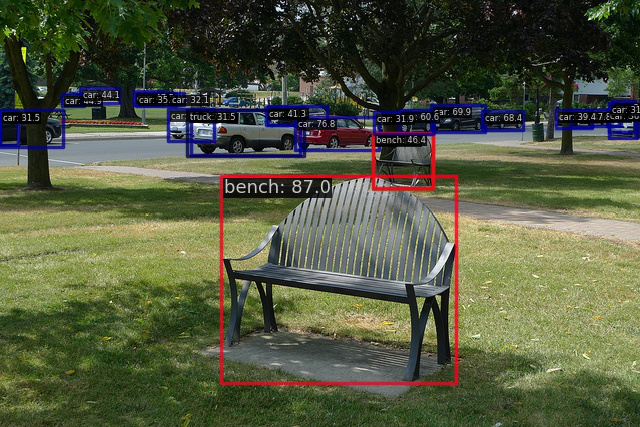

In [ ]:
# Show the output image
from PIL import Image
Image.open('./output/vis/demo.jpg')